<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Amir Homayoon sharifi zade

____________

In [13]:
#insert your information
NAME = 'Nima Mollaei'
STUDENT_NUMBER = '402106553'

# Libraries

In [3]:
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time
from itertools import combinations
from collections import Counter

# **Uninformed Search**

In this part you are going to implement the famous algorithms of graph search on some random graph.
At first you will implement DFS, after that BFS will be implemented and finally you'll implement some heuristic and preform A*.
Here are some helper functions to generate and plot the graph. Do not touch the code in the below cells and only complete the parts with a TODO hashtag.

In [4]:
# Create a random graph with blocked edges (None means blocked)
def generate_random_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}
    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph

In [5]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS

In [14]:
def dfs(graph, start, goal):
    stack = [start]  # Stack to store node
    parent = {start: None}  # Dictionary to store the parent of each node
    explored = []  # List to store explored nodes
    path = []  # List to store the path from start to goal
    goalfound = False
    while (stack and (not goalfound)):
        node = stack.pop()
        explored.append(node)

        for neighbour in reversed(graph[node]):
          if neighbour not in explored:
            parent[neighbour] = node
            if neighbour == goal:
              goalfound = True
              break

            stack.append(neighbour)
    parnode = parent[goal]
    path.append(goal)
    while parnode is not None:
      path.append(parnode)
      parnode = parent[parnode]


    path.reverse()

    return path, explored


# BFS

In [15]:
def bfs(graph, start, goal):
    queue = deque([start])
    parent = {start: None}  # Dictionary to store the parent of each node
    explored = []  # List to store explored nodes
    path = []  # List to store the path from start to goal
    goalfound = False
    while (queue and (not goalfound)):
        node = queue.popleft()
        explored.append(node)

        for neighbour in (graph[node]):
          if neighbour not in explored:
            parent[neighbour] = node
            if neighbour == goal:
              goalfound = True
              break

            queue.append(neighbour)
    parnode = parent[goal]
    path.append(goal)
    while parnode is not None:
      path.append(parnode)
      parnode = parent[parnode]


    path.reverse()
    return path, explored


**So far, we have explored two uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).**

Your Answer:
همانطور که مشاهده می‌کنیم، رویکرد DFS به مسائل به این صورت است که به صورت عمقی جستجو می‌کند؛ یعنی هر گره‌ای که باز می‌کند و در لیست fringe قرار می‌دهد، اولویت برای باز کردن گره بعدی با گره‌ای است که عمق بیشتری دارد. این روش به دلیل اینکه در هر مرحله تنها مسیر فعلی را در نظر می‌گیرد، حافظه کمتری مصرف می‌کند، اما لزوماً بهینه‌ترین مسیر را نمی‌یابد. علاوه بر این، اگر جواب در عمق کم باشد، DFS ممکن است ابتدا مسیرهای اشتباه را به طور کامل کاوش کند و در نتیجه زمان بیشتری را صرف کند.

در مقابل، رویکرد BFS به صورت سطحی جستجو می‌کند؛ یعنی به محض باز کردن هر گره، تمام فرزندان آن را در لیست fringe قرار می‌دهد و سپس به جستجوی فرزندان فرزندان می‌پردازد. این روش باعث می‌شود که حافظه بیشتری مصرف شود، اما در عوض، نسبت به DFS، سریع‌تر به بهینه‌ترین جواب دست می‌یابد. مزیت اصلی BFS پیدا کردن بهترین جواب در گراف‌های بدون وزن است که زمان کمتری می‌برد، اما عیب آن مصرف زیاد حافظه است. از طرف دیگر، در DFS حافظه کمتری مصرف می‌شود، اما نه تنها جواب بهینه به دست نمی‌آید بلکه زمان بیشتری برای یافتن جواب لازم است. بنابراین، یکی از راه‌حل‌ها می‌تواند ترکیب این دو رویکرد باشد، به طوری که از DFS با محدودیت عمق استفاده کنیم تا از هر دو مزیت بهره‌مند شویم.

# A star


In [16]:
# Define heuristic functions
# A* Search (using simple heuristics: Manhattan distance or random)

def manhattan_distance(a, b, pos):
     return abs(pos[a][0] - pos[b][0]) + abs(pos[b][1] - pos[b][1])
# Random heuristic

def random_heuristic(a, b, pos):
    return random.randint(1, 10)  # Random heuristic for demonstration

def a_star(graph, start, goal, heuristic, pos):
    queue = []
    starth = heuristic(start, goal, pos)
    heapq.heappush(queue, (starth, start))
    parent = {start: None}  # Dictionary to store the parent of each node
    explored = set()  # List to store explored nodes
    path = []  # List to store the path from start to goal
    entry_finder = {start: (0, starth)}  # Dictionary to track elements in the queue
    goalfound = False

    while queue and not goalfound:

        overallcost, node = heapq.heappop(queue)
        current_cost = entry_finder[node][0]
        if(node in explored):
          continue
        explored.add(node)
        # entry_finder.remove(node)


        if node == goal:
            goalfound = True
            break

        for neighbour in graph[node]:
            newh = heuristic(neighbour, goal, pos)
            new_cost = current_cost + 1  # Uniform cost since the graph is unweighted
            priority = new_cost + newh

            if neighbour not in explored and(neighbour not in entry_finder or priority < entry_finder[neighbour][0]+entry_finder[neighbour][1]):
                entry_finder[neighbour] = (new_cost, newh)
                heapq.heappush(queue, (new_cost + newh, neighbour))
                parent[neighbour] = node

    if goalfound:
        noded = goal
        path.append(goal)
        print(parent)
        while parent[noded] != None:
            # print(parent[noded])
            path.append(parent[noded])
            noded = parent[noded]
        path.reverse()

    return path, explored

# Results

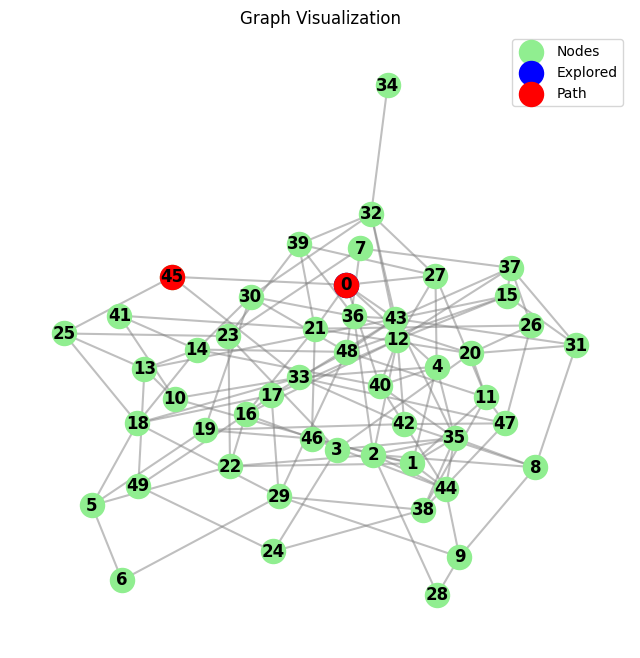

DFS Path: [0, 45]


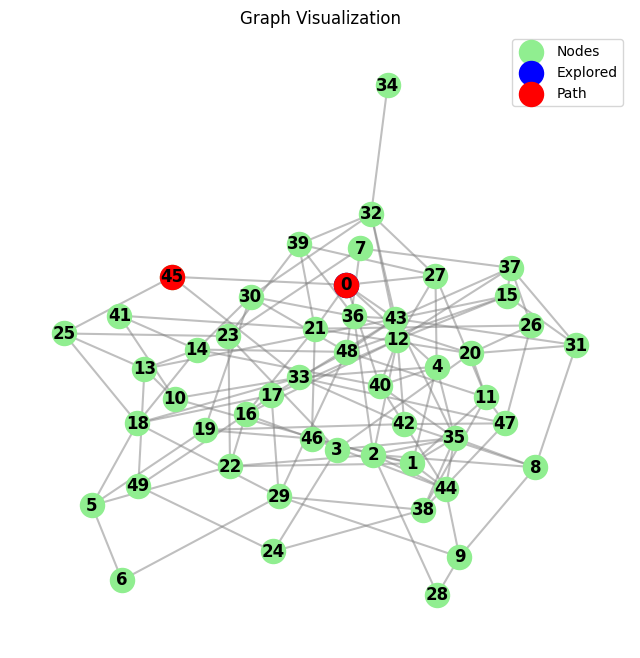

BFS Path: [0, 45]
{0: None, 4: 0, 21: 39, 27: 0, 40: 4, 43: 32, 45: 0, 1: 44, 33: 4, 35: 4, 12: 27, 14: 40, 44: 40, 2: 8, 9: 44, 46: 44, 8: 9, 28: 9, 29: 9, 31: 20, 42: 8, 6: 29, 17: 12, 18: 29, 38: 29, 48: 29, 10: 13, 22: 2, 36: 39, 11: 27, 32: 12, 39: 27, 23: 39, 15: 43, 16: 17, 37: 12, 30: 32, 34: 32, 13: 43, 25: 13, 49: 13, 20: 26, 26: 21, 41: 21, 47: 26, 3: 20}


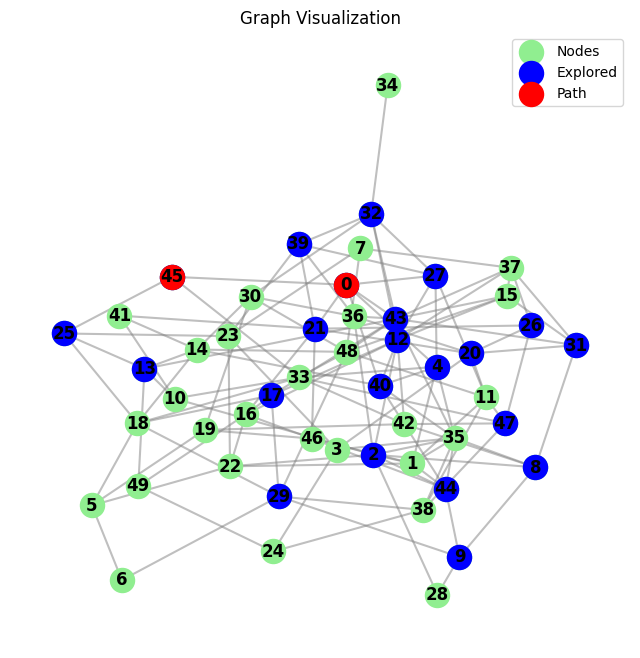

A* Path with Random Heuristic: [0, 45]
{0: None, 4: 0, 21: 0, 27: 0, 40: 0, 43: 0, 45: 0}


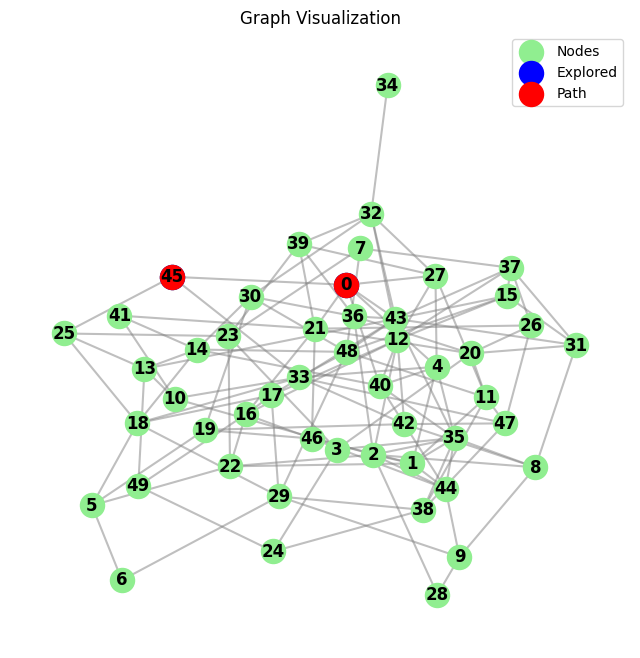

A* Path with Manhattan Distance Heuristic: [0, 45]


In [29]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random graph
random_graph = generate_random_graph(num_nodes)

# # Get random node positions for Manhattan distance calculation
positions = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(num_nodes)}

# Run DFS
#
# random_graph = {
#     0: [1,2],
#     1: [3,0],
#     2: [0,4],
#     3:  [1],
#     4:[2]



#     # 0 : [1,2,3],
#     # 1 : [0,4],
#     # 2 : [0,6],
#     # 3 : [0],
#     # 4 : [1,5,6],
#     # 5 : [4, 6],
#     # 6 : [4,5,2]

# }
# start_node = 0
# goal_node = 4
#
path_dfs, explored_dfs = dfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_dfs, explored=explored_dfs)
print(f"DFS Path: {path_dfs}")

# Run BFS
path_bfs, explored_bfs = bfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_bfs, explored=explored_bfs)
print(f"BFS Path: {path_bfs}")

# Run A* with Random Heuristic in same manner as above
path_a_star_random, explored_a_star_random = a_star(random_graph, start_node, goal_node, random_heuristic,positions)
plot_graph(random_graph, path=path_a_star_random, explored=explored_a_star_random)
print(f"A* Path with Random Heuristic: {path_a_star_random}")

# Run A* with Manhattan Distance Heuristic
path_a_star_manhattan, explored_a_star_manhattan = a_star(random_graph, start_node, goal_node, manhattan_distance ,positions)
plot_graph(random_graph, path=path_a_star_manhattan, explored=explored_a_star_manhattan)
print(f"A* Path with Manhattan Distance Heuristic: {path_a_star_manhattan}")


**Explain your heuristic and observation's result. Also, compare the A\* method with Uninformed search in the context of the problem.**

Your Answer:
تابع اکتشافی اول برای الگوریتم A* به صورت فاصله منهتن تعریف می‌شود. در این پیاده‌سازی، موقعیت هر گره با استفاده از مختصات pos مشخص می‌شود و سپس فاصله منهتن گره کنونی تا هدف (goal) به عنوان تابع اکتشافی در نظر گرفته می‌شود. لازم به ذکر است که در این حالت، چون
ℎ
∗
h
∗
  برابر با تعداد گره‌های طی‌شده بین گره مبدا و گره هدف است، ممکن است تابع اکتشافی تعریف‌شده، admissible نباشد. به این دلیل، هیچ تضمینی برای بهینه بودن مسیر به‌دست‌آمده وجود ندارد.

در تابع اکتشافی دوم که به صورت تصادفی تولید می‌شود، به وضوح به دلیل ویژگی تصادفی آن، ممکن است تابع اکتشافی admissible نباشد. در هر صورت، الگوریتم A* با توجه به تابع هیورستیک تعریف‌شده، با استفاده از رابطه
𝑓
(
𝑥
)
=
ℎ
(
𝑥
)
+
𝑔
(
𝑥
)
f(x)=h(x)+g(x) به دنبال یافتن مسیری به سمت هدف خواهد بود.

درواقع در uninformed search ها الگوریتم به صورت سیستماتیک سعی میکند مسیر های مختلف را بدون اولویت دادن نسبت به هم پیمایش کند اما در A* مقدار زیادی از این مسیر ها پیمایش نمیشوند زیرا ما یک نگاه رو به جلو نیز داریم و باعث میشود بفهمیم خیلی از مسیر ها بی فایده اند و آنها را حرس کنیم.

# **Weigted Graph**

In this part we are going to explore a situation in which every vertice has some cost and we want to minimize the cost as well. So one can say that the part before was a special kind of Weighted Graph with weights equal to 1 in every vertice.
Again the two cells below are helper functions that should not be modified.

In [30]:
# Create a random graph with weights on edges
def generate_weighted_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}

    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight  # Undirected graph
    return graph


In [31]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Display edge weights (weights on the edges)
    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization with Weights")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS With Cost

In [32]:
# Depth-First Search (DFS) with weight sum
def dfs_weighted(graph, start, goal):
    stack = [start]  # Stack to store node
    parent = {start: None}  # Dictionary to store the parent of each node
    explored = []  # List to store explored nodes
    path = []  # List to store the path from start to goal
    goalfound = False
    while (stack and (not goalfound)):
        node = stack.pop()
        explored.append(node)

        for neighbour in reversed(graph[node]):
          if neighbour not in explored:
            parent[neighbour] = node
            if neighbour == goal:
              goalfound = True
              break

            stack.append(neighbour)
    parnode = goal
    # path.append(goal)
    weight_sum = 0
    while parnode is not None:
      path.append(parnode)
      curr_node = parnode
      parnode = parent[parnode]
      if parnode != None:
        weight_sum += graph[parnode][curr_node]


    path.reverse()

    return path, weight_sum, explored


# BFS With Cost

In [33]:
# Breadth-First Search (BFS) with weight sum
def bfs_weighted(graph, start, goal):
    queue = deque([start])
    parent = {start: None}  # Dictionary to store the parent of each node
    explored = []  # List to store explored nodes
    path = []  # List to store the path from start to goal
    goalfound = False
    while (queue and (not goalfound)):
        node = queue.popleft()
        explored.append(node)

        for neighbour in (graph[node]):
          if neighbour not in explored:
            parent[neighbour] = node
            if neighbour == goal:
              goalfound = True
              break

            queue.append(neighbour)
    parnode = goal
    # path.append(goal)
    weight_sum = 0
    while parnode is not None:
      path.append(parnode)
      curr_node = parnode
      parnode = parent[parnode]
      if parnode != None:
        weight_sum += graph[parnode][curr_node]

    path.reverse()
    return path, weight_sum, explored




# Dijkstra (UCS)

In [34]:
# Dijkstra's Algorithm
def heuristic(a,b,c):
    return 0

def dijkstra(graph, start, goal):
    pos = 0 #just fo mute errors
    queue = []
    starth = heuristic(start, goal, pos)
    heapq.heappush(queue, (starth, start))
    parent = {start: None}  # Dictionary to store the parent of each node
    explored = set()  # List to store explored nodes
    path = []  # List to store the path from start to goal
    entry_finder = {start: (0, starth)}  # Dictionary to track elements in the queue
    goalfound = False

    while queue and not goalfound:

        overallcost, node = heapq.heappop(queue)
        current_cost = entry_finder[node][0]
        if(node in explored):
          continue
        explored.add(node)


        if node == goal:
            goalfound = True
            break

        for neighbour in graph[node]:
            newh = heuristic(neighbour, goal, pos)
            new_cost = current_cost + graph[node][neighbour]
            priority = new_cost + newh

            if neighbour not in entry_finder or priority < entry_finder[neighbour][0]+entry_finder[neighbour][1]:
                entry_finder[neighbour] = (new_cost, newh)
                heapq.heappush(queue, (new_cost + newh, neighbour))
                parent[neighbour] = node

    if goalfound:
        parnode = goal
        # path.append(goal)
        weight_sum = 0
    while parnode is not None:
      path.append(parnode)
      curr_node = parnode
      parnode = parent[parnode]
      if parnode != None:
        weight_sum += graph[parnode][curr_node]


    path.reverse()
    return path, weight_sum, explored


# Results

DFS Path: [0, 3, 30, 14, 45]
DFS Weight Sum: 27
BFS Path: [0, 7, 17, 45]
BFS Weight Sum: 13
Dijkstra Path: [0, 7, 33, 45]
Dijkstra Weight Sum: 11


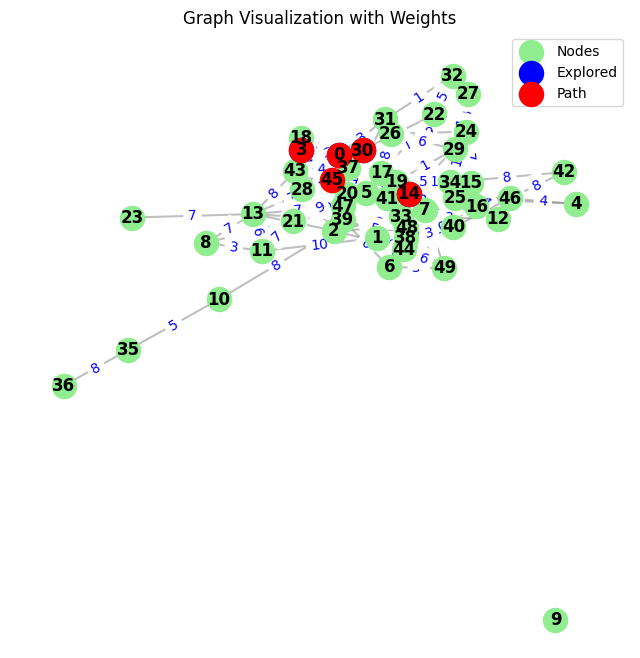

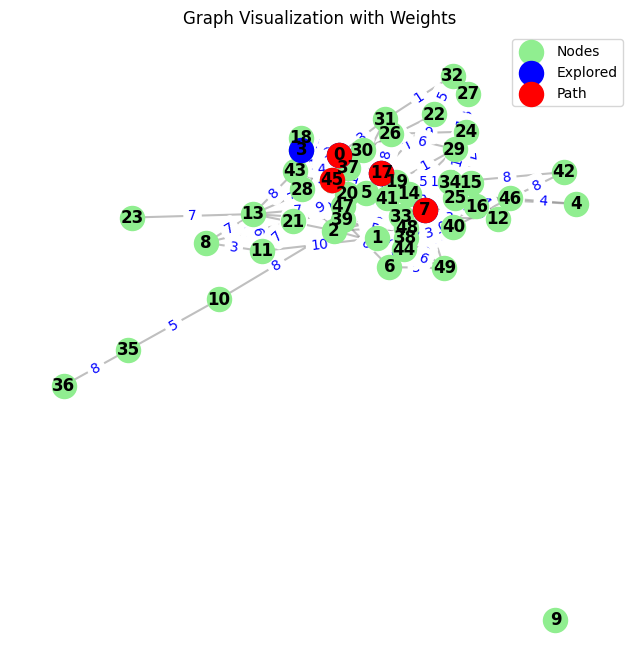

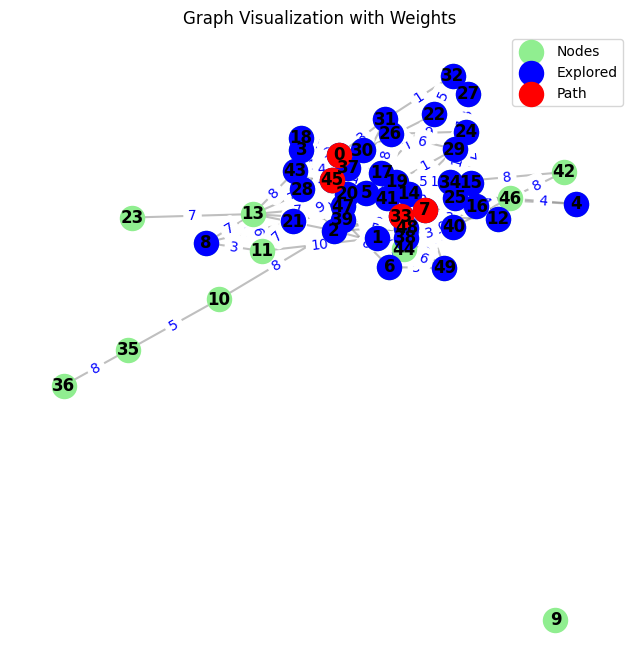

In [35]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random weighted graph
weighted_graph = generate_weighted_graph(num_nodes)

# Run DFS
path_dfs, weight_dfs, explored_dfs = dfs_weighted(weighted_graph, start_node, goal_node)
print(f"DFS Path: {path_dfs}")
print(f"DFS Weight Sum: {weight_dfs}")

# Run BFS
path_bfs, weight_bfs, explored_bfs = bfs_weighted(weighted_graph, start_node, goal_node)
print(f"BFS Path: {path_bfs}")
print(f"BFS Weight Sum: {weight_bfs}")

# Run Dijkstra
path_dijkstra, weight_dijkstra, explored_dijkstra = dijkstra(weighted_graph, start_node, goal_node)
print(f"Dijkstra Path: {path_dijkstra}")
print(f"Dijkstra Weight Sum: {weight_dijkstra}")

# Visualize the results
plot_graph(weighted_graph, path=path_dfs, explored=explored_dfs)
plot_graph(weighted_graph, path=path_bfs, explored=explored_bfs)
plot_graph(weighted_graph, path=path_dijkstra, explored=explored_dijkstra)


**What are the key diffrences between dijkstra, bfs and dfs? Which one of them has acted better in our problem and why? What happens when graph is directed?**

Your Answer:
همانطور که در بخش قبل مشاهده کردیم، برای پیدا کردن مسیر، به وضوح BFS نسبت به DFS عملکرد بهتری دارد، چرا که DFS قادر به پیدا کردن مسیر بهینه نیست و از نظر زمانی نیز مناسب نمی‌باشد. البته BFS نیز مصرف حافظه زیادی دارد. اما زمانی که گراف وزن‌دار باشد، دیگر BFS نمی‌تواند کوتاه‌ترین مسیر را پیدا کند، چرا که به وزن یال‌ها توجهی ندارد. در این شرایط، الگوریتم UCS که نوعی جستجوی حریصانه است، بر اساس مقدار

g(x) گره‌ها را باز می‌کند تا به هدف برسد و بنابراین به وزن یال‌ها توجه دارد. این امر موجب می‌شود که UCS به دنبال پیدا کردن کوتاه‌ترین مسیر به سمت هدف باشد. بنابراین، در این حالت، به‌وضوح الگوریتم UCS گزینه بهتری است.

همچنین، اگر گراف جهت‌دار باشد، تفاوت اصلی این خواهد بود که اگر یک یال تنها از گره A به گره B باشد، زمانی که گره A گسترش می‌یابد، گره B به عنوان یکی از فرزندان آن در نظر گرفته می‌شود. اما زمانی که گره B گسترش یابد، گره A در فرزندان آن نخواهد بود. بنابراین، در گراف‌های جهت‌دار، تنها باید به جهت یال‌ها توجه شود.

# **Local Search**

# Problem definition
In this part, you should implement **Hill-Climbing** and **Genentic** algorithms. Afterwards you will test them on a formal np problem (Subset Sum)

Suppose we have a limit for our back pack that we show with *target_sum* and random number of materials with some rand weights which are present in *nums*. To do that we will implement 3 algorithms. First, you should implement  **Hill-Climbing**, and then you should implement the **Genetic Algorithm**. At last, you should find the actual answer using **Naive Search (brute force)**.

In [6]:
# Sample input for Subset Sum Problem
target_sum = 60
nums = [random.randint(1, 10) for _ in range(15)]  # Random list of 15 integers between 1 and 10

print(f"Numbers: {nums}")
print(f"Target Sum: {target_sum}")


Numbers: [3, 2, 2, 10, 6, 8, 4, 7, 4, 4, 8, 7, 4, 9, 8]
Target Sum: 60


# Hill Climbing

In order to implement hill climbing, you must at first define the neighbors in your model. We suggest that every addition or omition of your current bag should be a neighbor yet you can implement it how you want.

In [7]:


def subtract_lists(list1, list2):
    # Count the occurrences of elements in both lists
    counter1 = Counter(list1)
    counter2 = Counter(list2)

    # Subtract the counts of list2 from list1
    result_counter = counter1 - counter2

    # Convert the result back to a list (repeating elements as needed)
    result = list(result_counter.elements())

    return result


# print(nums_for_add_to_state)

def neighbor_maker(nums, current_state):
  neighbors = []
  curr_copy = current_state.copy()
  nums_for_add_to_state = subtract_lists(nums, current_state)

  for i in nums_for_add_to_state:
    curr_copy.append(i)
    neighbors.append(curr_copy)
    curr_copy = current_state.copy()

  for i in current_state:
    curr_copy.remove(i)
    neighbors.append(curr_copy)
    curr_copy = current_state.copy()

  return neighbors


def hill_climbing(nums, target_sum):
    #Random initial solution (subset of nums)
    current_solution = random.sample(nums, random.randint(1, len(nums)))
    current_sum = sum(current_solution)
    #TODO Hill climbing
    best_sum = current_sum
    if best_sum == target_sum:
      return current_solution
    while True:
      having_better_neighbor = False
      neighbors = neighbor_maker(nums, current_solution)

      for neigh in neighbors:
        if abs(target_sum - sum(neigh)) < abs(target_sum - best_sum) :
          if sum(neigh) == target_sum:
            return neigh
          having_better_neighbor = True
          best_sum = sum(neigh)
          current_solution = neigh
      if not having_better_neighbor:
        break
    #return a current solution = best state value
    #Hill climbing loop
    #Generate neighbors by adding one element or removing one element
    #Evaluate the neighbors by calculating the sum
    #If no improvement, stop
    return current_solution

last_sol = hill_climbing(nums, target_sum)
print(last_sol)
print(sum(last_sol))

[4, 10, 7, 8, 9, 8, 8, 6]
60


# Genetic Algorithm
As you have learned, in order to implement GA, you need to define mutation function and crossover functions(single pointed one would be enough).

Then, in main GA body, a population of random solutions (subsets) is created. These solutions evolve over a number of generations through selection, crossover, and mutation.
The algorithm aims to evolve the population towards finding a subset whose sum is as close as possible to the target sum. After a set number of generations, the algorithm returns the best solution found.

In [8]:
def tournament_selection(population, target_sum, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: abs(target_sum - sum(x)))
    return tournament[0]  # Best solution in the tournament

def crossover(parent1, parent2):
    # Single-point crossover
    #TODO randomly choose one point and do crossover on that
    #return childs created of process (child1 and child 2)
    min_len_child = min(len(parent1), len(parent2))
    random_index = random.randint(0, min_len_child - 1)

    # Create child1 by taking the first part of parent1 and the second part of parent2
    child1 = parent1[:random_index] + parent2[random_index:]

    # Create child2 by taking the first part of parent2 and the second part of parent1
    child2 = parent2[:random_index] + parent1[random_index:]

    return child1, child2




def mutate(solution, nums, mutation_rate=0.1):
    # Decide whether mutation will happen based on mutation_rate
    if random.uniform(0, 1) < mutation_rate:
        # Decide whether to add or remove an element
        if random.uniform(0, 1) < 0.5:
            # Adding a random number from nums that is not in the solution
            nums_to_add = [num for num in nums if num not in solution]
            if nums_to_add:  # If there are available numbers to add
                solution.append(random.choice(nums_to_add))
        else:
            # Removing a random number from the solution
            if solution:  # Ensure the solution isn't empty before removing
                solution.pop(random.randint(0, len(solution) - 1))

    return solution





In [12]:
def is_valid_sublist(child, nums):
    # Create a Counter for both the child and nums
    nums_counter = Counter(nums)
    child_counter = Counter(child)

    # Check that every element in child is in nums and the frequency is valid
    return all(child_counter[item] <= nums_counter[item] for item in child)

def genetic_algorithm(nums, target_sum, population_size=50, generations=100, mutation_rate=0.1):
    # Random initial population
    population = [random.sample(nums, random.randint(1, len(nums))) for _ in range(population_size)]

    for generation in range(generations):
        # Sort population by fitness (closest to target_sum)
        population.sort(key=lambda x: abs(target_sum - sum(x)))

        # If we have a solution that matches the target, return it
        if sum(population[0]) == target_sum:
            return population[0]

        # Create new generation using tournament selection, crossover, and mutation
        new_generation = []
        while len(new_generation) < population_size:
            # Select parents using tournament selection
            parent1 = tournament_selection(population, target_sum)
            parent2 = tournament_selection(population, target_sum)

            # Perform crossover to create children
            child1, child2 = crossover(parent1, parent2)

            # Apply mutation to children
            mutate(child1, nums, mutation_rate)
            mutate(child2, nums, mutation_rate)


            while not is_valid_sublist(child1, nums) or not is_valid_sublist(child2, nums):
        # If not valid, regenerate children
              child1, child2 = crossover(parent1, parent2)
              mutate(child1, nums, mutation_rate)
              mutate(child2, nums, mutation_rate)

            # Add children to the new generation
            new_generation.append(child1)
            new_generation.append(child2)

        # Update population to the new generation
        population = new_generation[:population_size]  # Ensure population size is maintained
    return population[0]  # Return the best solution after all generations
a = genetic_algorithm(nums,target_sum, 50,100,0.1)
print(a)
print(sum(a))
print(nums)


[4, 4, 6, 3, 4, 7, 10, 8, 2, 8, 4]
60
[3, 2, 2, 10, 6, 8, 4, 7, 4, 4, 8, 7, 4, 9, 8]


# Brute Force

In [36]:
def brute_force(nums, target_sum):
    # Initialize variables to track the best subset and its sum difference
    best_state = []
    best_diff = float('inf')

    # Iterate through all possible subsets using bitmask
    num_elements = len(nums)
    for i in range(1 << num_elements):  # (1 << num_elements) is 2^num_elements
        subset = []
        # Check each bit to decide if the corresponding element is in the subset
        for j in range(num_elements):
            if i & (1 << j):  # If the j-th bit is set, include nums[j] in the subset
                subset.append(nums[j])

        # Calculate the difference from the target_sum
        diff = abs(sum(subset) - target_sum)

        # Update the best subset if the current one is closer to the target
        if diff < best_diff:
            best_state = subset
            best_diff = diff

    return best_state



# Comparison

Run the 3 algorithms 10 times and watch the result. Hill climbing and Genetic Algorithm results should be close to actual answers(brute force results).


In [37]:
# Running the algorithms multiple times with different random setups
def run_multiple_trials(num_trials=10):
    hill_climbing_times = []
    ga_times = []
    brute_force_times = []

    hill_climbing_solutions = []
    ga_solutions = []
    brute_force_solutions = []

    for i in range(num_trials):
        # Generate random setup for each trial
        target_sum = random.randint(50, 100)  # Random target sum between 10 and 50
        nums = [random.randint(1, 10) for _ in range(random.randint(10, 20))]  # Random list size between 10 and 20
        hill_climb_sum = 0
        genetic_sum = 0
        brute_force_sum = 0
        # Print the current trial setup
        print(f"Trial {i + 1}: Target Sum = {target_sum}, Numbers = {nums}")

        # Hill Climbing
        start_time = time.time()
        hill_climb_result = hill_climbing(nums, target_sum)
        hill_climb_time = time.time() - start_time
        hill_climbing_times.append(hill_climb_time)
        hill_climbing_solutions.append(hill_climb_result)
        hill_climb_sum = sum(hill_climb_result)

        # Genetic Algorithm
        start_time = time.time()
        ga_result = genetic_algorithm(nums, target_sum)
        ga_time = time.time() - start_time
        ga_times.append(ga_time)
        ga_solutions.append(ga_result)
        genetic_sum = sum(ga_result)

        # Brute Force
        start_time = time.time()
        brute_force_result = brute_force(nums, target_sum)
        brute_force_time = time.time() - start_time
        brute_force_times.append(brute_force_time)
        brute_force_solutions.append(brute_force_result)
        brute_force_sum = sum(brute_force_result) if brute_force_result else 0

        # Print each trial result
        print(f"Hill Climbing Result: {hill_climb_result}, final sum: {hill_climb_sum}, Time Taken: {hill_climb_time:.4f} seconds")
        print(f"Genetic Algorithm Result: {ga_result}, final sum: {genetic_sum}, Time Taken: {ga_time:.4f} seconds")
        print(f"Brute Force Result: {brute_force_result}, final sum: {brute_force_sum}, Time Taken: {brute_force_time:.4f} seconds\n")

    # Calculate average times
    avg_hill_climbing_time = sum(hill_climbing_times) / num_trials
    avg_ga_time = sum(ga_times) / num_trials
    avg_brute_force_time = sum(brute_force_times) / num_trials

    print("\nAverage Times over 10 Trials:")
    print(f"Hill Climbing Average Time: {avg_hill_climbing_time:.4f} seconds")
    print(f"Genetic Algorithm Average Time: {avg_ga_time:.4f} seconds")
    print(f"Brute Force Average Time: {avg_brute_force_time:.4f} seconds")

# Run the comparison with 10 trials
run_multiple_trials(num_trials=10)


Trial 1: Target Sum = 92, Numbers = [7, 9, 3, 7, 10, 8, 3, 3, 9, 4]
Hill Climbing Result: [7, 3, 9, 3, 4, 7, 10, 9, 8, 3], final sum: 63, Time Taken: 0.0002 seconds
Genetic Algorithm Result: [3, 9, 7, 7, 8, 3, 9, 3, 4, 10], final sum: 63, Time Taken: 0.1011 seconds
Brute Force Result: [7, 9, 3, 7, 10, 8, 3, 3, 9, 4], final sum: 63, Time Taken: 0.0011 seconds

Trial 2: Target Sum = 82, Numbers = [2, 2, 1, 10, 2, 8, 10, 8, 7, 1, 6, 2, 2, 8]
Hill Climbing Result: [2, 8, 8, 2, 6, 2, 10, 10, 8, 7, 2, 2, 1, 1], final sum: 69, Time Taken: 0.0002 seconds
Genetic Algorithm Result: [2, 2, 10, 6, 8, 2, 7, 2, 8, 10, 8, 2, 1, 1], final sum: 69, Time Taken: 0.0820 seconds
Brute Force Result: [2, 2, 1, 10, 2, 8, 10, 8, 7, 1, 6, 2, 2, 8], final sum: 69, Time Taken: 0.0232 seconds

Trial 3: Target Sum = 55, Numbers = [7, 3, 5, 2, 6, 2, 1, 4, 8, 5, 4, 4, 7, 7, 2, 5, 4, 8, 3]
Hill Climbing Result: [2, 6, 2, 7, 5, 7, 4, 3, 5, 2, 4, 1, 3, 4], final sum: 55, Time Taken: 0.0002 seconds
Genetic Algorithm Resu

**Now Compare and contrast the performance of brute-force search, hill climbing, and genetic algorithms in Problems. Discuss the strengths and weaknesses of each approach in this context, and explain when each algorithm might be preferred over the others.**


Your Answer:
همانطور که دیدیم، برای دستیابی به یک جواب دقیق، می‌توان از روش brute force استفاده کرد. با این حال، این روش از نظر زمان و حافظه هزینه زیادی دارد، چرا که رویکرد آن جستجو بین تمامی حالات ممکن است تا به هدف مورد نظر برسد، که به طور بدیهی زمان زیادی خواهد برد. اما با این روش می‌توانیم جواب دقیقی بدست آوریم.

در الگوریتم hill climbing، فرآیند به این شکل است که از یک جواب تصادفی شروع می‌کنیم و هدف ما بهبود آن است. به این صورت که در بین فرزندان وضعیت کنونی، جستجو می‌کنیم و اگر فرزندی وجود داشته باشد که بهتر از وضعیت فعلی باشد، به آن فرزند می‌رویم. این فرآیند باعث می‌شود که هر بار به هدف نزدیکتر شویم. از مزایای این الگوریتم می‌توان به مصرف حافظه کم اشاره کرد، زیرا تنها نیاز به ذخیره وضعیت کنونی داریم و زمان یافتن پاسخ نیز کوتاه است. اما مشکل اصلی این است که ممکن است الگوریتم به سمت local goalها حرکت کند، یعنی به مکان‌هایی برسد که هدف نهایی نیستند و هیچ بهبودی نمی‌توان در آنجا اعمال کرد.

الگوریتم ژنتیک که نوعی جستجوی local beam است، در مقایسه با hill climbing رویکردی متفاوت دارد. در این الگوریتم، به جای نگه داشتن یک وضعیت، چندین وضعیت خوب (k حالت) در نظر گرفته می‌شود. سپس با استفاده از تکنیک‌هایی مانند crossover، وضعیت‌های جدید از ترکیب وضعیت‌های موجود تولید می‌شود. همچنین، با استفاده از mutation، الگوریتم سعی می‌کند از local goalها فرار کند. این الگوریتم علاوه بر اینکه از نظر زمان و حافظه بهینه‌تر است، معمولاً به نتایج دقیق‌تری نسبت به hill climbing می‌رسد.

در نهایت، می‌توان گفت که برای مسائل کوچک و زمانی که نیاز به جواب دقیق داریم، روش brute force مناسب است. الگوریتم hill climbing برای مسائل بزرگتر و زمانی که جواب تقریبی کافی است، کارآمدتر خواهد بود. الگوریتم ژنتیک برای مسائلی که فضای جستجو پیچیده دارند و روش‌های دیگر که قادر به یافتن جواب‌های مناسب نیستند، گزینه‌ای مؤثر خواهد بود.



